In [1]:
import pandas as pd
import zerorpc
from datetime import datetime

client = zerorpc.Client()
client.connect("tcp://127.0.0.1:1234")

[<SocketContext(connect='tcp://127.0.0.1:1234')>]

In [2]:
print(client.hello())
hist_cdls = client.get_historical_candles(0, 0, 
                                          int(round(datetime.timestamp(datetime.fromisoformat('2022-05-01'))*1000)),
                                          int(round(datetime.timestamp(datetime.fromisoformat('2022-05-08'))*1000)))
print(hist_cdls)

Hello
[{'time': 1651363200000, 'open': '37630.80000000', 'high': '37806.79000000', 'low': '37500.00000000', 'close': '37680.67000000', 'volume': '2313.83572000'}, {'time': 1651366800000, 'open': '37680.66000000', 'high': '38077.10000000', 'low': '37386.38000000', 'close': '37937.07000000', 'volume': '2622.65157000'}, {'time': 1651370400000, 'open': '37937.07000000', 'high': '38053.68000000', 'low': '37771.81000000', 'close': '37817.79000000', 'volume': '1081.24561000'}, {'time': 1651374000000, 'open': '37817.78000000', 'high': '38064.39000000', 'low': '37801.52000000', 'close': '38041.44000000', 'volume': '966.53850000'}, {'time': 1651377600000, 'open': '38041.44000000', 'high': '38063.41000000', 'low': '37885.30000000', 'close': '37948.39000000', 'volume': '1405.77554000'}, {'time': 1651381200000, 'open': '37948.39000000', 'high': '38165.12000000', 'low': '37899.21000000', 'close': '38060.05000000', 'volume': '2186.40640000'}, {'time': 1651384800000, 'open': '38060.06000000', 'high': 

In [3]:
data = pd.DataFrame(hist_cdls)
print(data)
print(type(data.time))

              time            open            high             low  \
0    1651363200000  37630.80000000  37806.79000000  37500.00000000   
1    1651366800000  37680.66000000  38077.10000000  37386.38000000   
2    1651370400000  37937.07000000  38053.68000000  37771.81000000   
3    1651374000000  37817.78000000  38064.39000000  37801.52000000   
4    1651377600000  38041.44000000  38063.41000000  37885.30000000   
..             ...             ...             ...             ...   
164  1651953600000  35876.37000000  35876.37000000  35752.35000000   
165  1651957200000  35785.69000000  35820.91000000  35000.00000000   
166  1651960800000  35026.37000000  35328.47000000  34785.00000000   
167  1651964400000  35046.07000000  35769.69000000  35015.53000000   
168  1651968000000  35472.40000000  35514.22000000  35071.97000000   

              close         volume  
0    37680.67000000  2313.83572000  
1    37937.07000000  2622.65157000  
2    37817.79000000  1081.24561000  
3    38041.

In [4]:
data.time = pd.to_datetime(data.time)
print(type(data.time))
print(data)

#data['time'] = pd.to_datetime(data['time'], unit='ms')
#data = data.set_index('time')
#print(data)
#print(type(cdl_df['time']))
#print(type(data.index))

<class 'pandas.core.series.Series'>
                          time            open            high  \
0   1970-01-01 00:27:31.363200  37630.80000000  37806.79000000   
1   1970-01-01 00:27:31.366800  37680.66000000  38077.10000000   
2   1970-01-01 00:27:31.370400  37937.07000000  38053.68000000   
3   1970-01-01 00:27:31.374000  37817.78000000  38064.39000000   
4   1970-01-01 00:27:31.377600  38041.44000000  38063.41000000   
..                         ...             ...             ...   
164 1970-01-01 00:27:31.953600  35876.37000000  35876.37000000   
165 1970-01-01 00:27:31.957200  35785.69000000  35820.91000000   
166 1970-01-01 00:27:31.960800  35026.37000000  35328.47000000   
167 1970-01-01 00:27:31.964400  35046.07000000  35769.69000000   
168 1970-01-01 00:27:31.968000  35472.40000000  35514.22000000   

                low           close         volume  
0    37500.00000000  37680.67000000  2313.83572000  
1    37386.38000000  37937.07000000  2622.65157000  
2    37771.8

In [5]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

/opt/bitnami/jupyterhub-singleuser/.local/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [6]:
plt.style.use('ggplot')
ohlc = data.loc[:, ['time', 'open', 'high', 'low', 'close']]
ohlc['time'] = pd.to_datetime(ohlc['time'],  unit='ms')
ohlc['time'] = ohlc['time'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

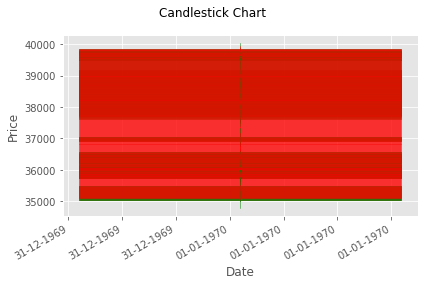

In [7]:
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()